In [10]:
from rockit import * 
import casadi as ca
import numpy as np  
import matplotlib.pyplot as plt

In [11]:
ocp = Ocp(T=FreeTime(10))

point00 = [0,0,0]
point01 = [0,0,-30]
point02 = [0,0,-40]
point03 = [0,0,-50]

# two_stages = True

stage = 3

In [12]:
def add_stage(ocp):
    
    # ====> Stage
    stage = ocp.stage(T=FreeTime(10))
    
    # ====> States
    x_pos = stage.state()
    y_pos = stage.state()
    z_pos = stage.state()
    t = stage.state()
    azi = stage.state()
    incl = stage.state()
    
    # ====> Controls
    u_azi = stage.control()
    u_incl = stage.control()
    inverse_rop = stage.control()
    
    # ====> System Dynamics
    stage.set_der(x_pos, ca.sin(azi) * ca.cos(incl))
    stage.set_der(y_pos, ca.sin(azi) * ca.sin(incl))
    stage.set_der(z_pos, ca.cos(incl))
    stage.set_der(t, inverse_rop)
    stage.set_der(azi, u_azi)
    stage.set_der(incl, u_incl)
    
    # ====> Path Constraints
    max_bur = 0.05
    rop_max = 30.0
    rop_min = 5.0
    
    # -----
    stage.subject_to(u_incl >= -max_bur)
    stage.subject_to(u_incl <= max_bur)
    stage.subject_to(u_azi >= -max_bur)
    stage.subject_to(u_azi <= max_bur)
    # -----
    stage.subject_to(incl >= ca.pi/2)
    stage.subject_to(incl <= 3*ca.pi/2)
    # -----
    stage.subject_to(inverse_rop >= 1/rop_max)
    stage.subject_to(inverse_rop <= 1/rop_min)
    
    # ====> Discretization Method
    stage.method(DirectCollocation(N=20))
    
    return (stage, [x_pos, y_pos, z_pos, t, azi, incl], [u_azi, u_incl, inverse_rop])
    
    

In [13]:
stage1, states1, controls1 = add_stage(ocp)

x1 = states1[0]
y1 = states1[1]
z1 = states1[2]
t1 = states1[3]
azi1 = states1[4]
incl1 = states1[5]

u_azi1 = controls1[0]
u_incl1 = controls1[1]
inverse_rop1 = controls1[2]

print(f"Stage 1 added with states and controls.\n States1: {states1}, \n Controls1: {controls1}")

ocp.subject_to(stage1.at_t0(x1) == point00[0])
ocp.subject_to(stage1.at_t0(y1) == point00[1])
ocp.subject_to(stage1.at_t0(z1) == point00[2])
ocp.subject_to(stage1.at_t0(t1) == 0)
ocp.subject_to(stage1.at_t0(azi1) == 0)
ocp.subject_to(stage1.at_t0(incl1) == ca.pi)


ocp.subject_to(stage1.at_tf(x1) == point01[0])
ocp.subject_to(stage1.at_tf(y1) == point01[1])
ocp.subject_to(stage1.at_tf(z1) == point01[2])

Stage 1 added with states and controls.
 States1: [MX(x1), MX(x2), MX(x3), MX(x4), MX(x5), MX(x6)], 
 Controls1: [MX(u), MX(u), MX(u)]


In [14]:
if stage >= 2:
    stage2, states2, controls2 = add_stage(ocp)
    
    x2 = states2[0]
    y2 = states2[1]
    z2 = states2[2]
    t2 = states2[3]
    azi2 = states2[4]
    incl2 = states2[5]

    u_azi2 = controls2[0]
    u_incl2 = controls2[1]
    inverse_rop2 = controls2[2]

    print(f"Stage 2 added with states and controls.\n States2: {states2}, \n Controls2: {controls2}")

    ocp.subject_to(stage2.at_t0(x2) == stage1.at_tf(x1))
    ocp.subject_to(stage2.at_t0(y2) == stage1.at_tf(y1))
    ocp.subject_to(stage2.at_t0(z2) == stage1.at_tf(z1))
    ocp.subject_to(stage2.at_t0(t2) == stage1.at_tf(t1))
    ocp.subject_to(stage2.at_t0(azi2) == stage1.at_tf(azi1))
    ocp.subject_to(stage2.at_t0(incl2) == stage1.at_tf(incl1))
    
    ocp.subject_to(stage2.at_tf(x2) == point02[0])
    ocp.subject_to(stage2.at_tf(y2) == point02[1])
    ocp.subject_to(stage2.at_tf(z2) == point02[2])

Stage 2 added with states and controls.
 States2: [MX(x1), MX(x2), MX(x3), MX(x4), MX(x5), MX(x6)], 
 Controls2: [MX(u), MX(u), MX(u)]


In [15]:
if stage <= 3:
    stage3, states3, controls3 = add_stage(ocp)
    
    x3 = states3[0]
    y3 = states3[1]
    z3 = states3[2]
    t3 = states3[3]
    azi3 = states3[4]
    incl3 = states3[5]

    u_azi3 = controls3[0]
    u_incl3 = controls3[1]
    inverse_rop3 = controls3[2]

    print(f"Stage 3 added with states and controls.\n States3: {states3}, \n Controls3: {controls3}")

    ocp.subject_to(stage3.at_t0(x3) == stage2.at_tf(x2))
    ocp.subject_to(stage3.at_t0(y3) == stage2.at_tf(y2))
    ocp.subject_to(stage3.at_t0(z3) == stage2.at_tf(z2))
    ocp.subject_to(stage3.at_t0(t3) == stage2.at_tf(t2))
    ocp.subject_to(stage3.at_t0(azi3) == stage2.at_tf(azi2))
    ocp.subject_to(stage3.at_t0(incl3) == stage2.at_tf(incl2))
    
    ocp.subject_to(stage3.at_tf(x3) == point03[0])
    ocp.subject_to(stage3.at_tf(y3) == point03[1])
    ocp.subject_to(stage3.at_tf(z3) == point03[2])

Stage 3 added with states and controls.
 States3: [MX(x1), MX(x2), MX(x3), MX(x4), MX(x5), MX(x6)], 
 Controls3: [MX(u), MX(u), MX(u)]


In [16]:
if stage == 2:
    stage2.add_objective(stage2.at_tf(t2))
    print(f"Stage 2 objective added: {stage2.at_tf(t2)}")
elif stage == 3:
    stage3.add_objective(stage3.at_tf(t3))
    print(f"Stage 3 objective added: {stage3.at_tf(t3)}")
else:
    stage1.add_objective(stage1.at_tf(t1))
    print(f"Stage 1 objective added: {stage1.at_tf(t1)}")

Stage 3 objective added: r_at_tf


In [17]:
ocp.solver('ipopt')
sol = ocp.solve()

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:    12759
Number of nonzeros in inequality constraint Jacobian.:      507
Number of nonzeros in Lagrangian Hessian.............:     2523

Total number of variables............................:     2001
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1827
Total number of inequality constraints...............:      507
        inequality constraints with only lower bounds:      255
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      252

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 5.00e+01 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:    12765
Number of nonzeros in inequality constraint Jacobian.:      507
Number of nonzeros in Lagrangian Hessian.............:     2523

Total number of variables............................:     2001
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1833
Total number of inequality constraints...............:      507
        inequality constraints with only lower bounds:      255
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      252

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 5.00e+01 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

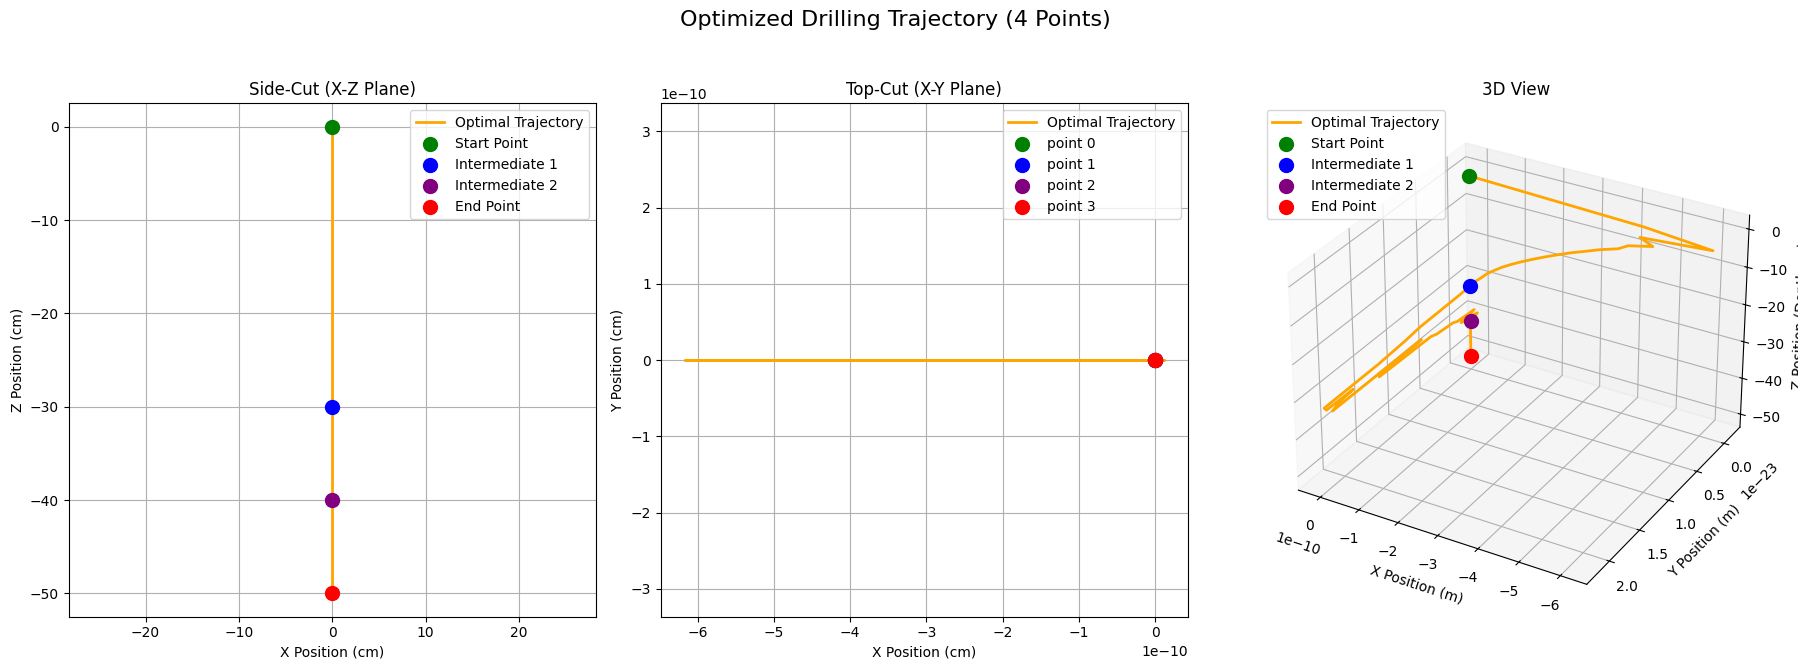

In [18]:
from rockit import *
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

# --- Problem Setup ---
ocp = Ocp(T=FreeTime(10))

point00 = [0,0,0]
point01 = [0,0,-30]
point02 = [0,0,-40]
point03 = [0,0,-50]

stage_count = 3 # Set to 3 for a 4-point trajectory

# --- Function to Define a Stage ---
def add_stage(ocp):
    
    # ====> Stage
    stage = ocp.stage(T=FreeTime(10))
    
    # ====> States
    x_pos = stage.state()
    y_pos = stage.state()
    z_pos = stage.state()
    t = stage.state()
    azi = stage.state()
    incl = stage.state()
    
    # ====> Controls
    u_azi = stage.control()
    u_incl = stage.control()
    inverse_rop = stage.control()
    
    # ====> System Dynamics
    stage.set_der(x_pos, ca.cos(azi) * ca.sin(incl))
    stage.set_der(y_pos, ca.sin(azi) * ca.sin(incl))
    stage.set_der(z_pos, ca.cos(incl))
    stage.set_der(t, inverse_rop)
    stage.set_der(azi, u_azi)
    stage.set_der(incl, u_incl)
    
    # ====> Path Constraints
    max_bur = 5*ca.pi/4
    rop_max = 30.0
    rop_min = 5.0
    
    # -----

    stage.subject_to(u_incl >= -max_bur)
    stage.subject_to(u_incl <= max_bur)
    stage.subject_to(u_azi >= -max_bur)
    stage.subject_to(u_azi <= max_bur)
    
    # stage.subject_to(u_incl == 0)
    # stage.subject_to(u_azi == 0)
    
    # -----
    stage.subject_to(incl >= ca.pi/2)
    stage.subject_to(incl <= 3*ca.pi/2)
    # -----
    stage.subject_to(inverse_rop >= 1/rop_max)
    stage.subject_to(inverse_rop <= 1/rop_min)
    
    # ====> Discretization Method
    stage.method(DirectCollocation(N=20))
    
    return (stage, [x_pos, y_pos, z_pos, t, azi, incl], [u_azi, u_incl, inverse_rop])

# --- Stage 1 ---
stage1, states1, controls1 = add_stage(ocp)
x1, y1, z1, t1, azi1, incl1 = states1
ocp.subject_to(stage1.at_t0(x1) == point00[0])
ocp.subject_to(stage1.at_t0(y1) == point00[1])
ocp.subject_to(stage1.at_t0(z1) == point00[2])
ocp.subject_to(stage1.at_t0(t1) == 0)
ocp.subject_to(stage1.at_t0(azi1) == 0)
ocp.subject_to(stage1.at_t0(incl1) == ca.pi)
ocp.subject_to(stage1.at_tf(x1) == point01[0])
ocp.subject_to(stage1.at_tf(y1) == point01[1])
ocp.subject_to(stage1.at_tf(z1) == point01[2])
ocp.subject_to(stage1.at_tf(azi1) == 0)
ocp.subject_to(stage1.at_tf(incl1) == ca.pi)

# --- Stage 2 ---
if stage_count >= 2:
    stage2, states2, controls2 = add_stage(ocp)
    x2, y2, z2, t2, azi2, incl2 = states2
    ocp.subject_to(stage2.at_t0(x2) == stage1.at_tf(x1))
    ocp.subject_to(stage2.at_t0(y2) == stage1.at_tf(y1))
    ocp.subject_to(stage2.at_t0(z2) == stage1.at_tf(z1))
    ocp.subject_to(stage2.at_t0(t2) == stage1.at_tf(t1))
    ocp.subject_to(stage2.at_t0(azi2) == stage1.at_tf(azi1))
    ocp.subject_to(stage2.at_t0(incl2) == stage1.at_tf(incl1))
    ocp.subject_to(stage2.at_tf(x2) == point02[0])
    ocp.subject_to(stage2.at_tf(y2) == point02[1])
    ocp.subject_to(stage2.at_tf(z2) == point02[2])
    ocp.subject_to(stage2.at_tf(azi2) == 0)
    ocp.subject_to(stage2.at_tf(incl2) == ca.pi)

# --- Stage 3 ---
if stage_count >= 3:
    stage3, states3, controls3 = add_stage(ocp)
    x3, y3, z3, t3, azi3, incl3 = states3
    ocp.subject_to(stage3.at_t0(x3) == stage2.at_tf(x2))
    ocp.subject_to(stage3.at_t0(y3) == stage2.at_tf(y2))
    ocp.subject_to(stage3.at_t0(z3) == stage2.at_tf(z2))
    ocp.subject_to(stage3.at_t0(t3) == stage2.at_tf(t2))
    ocp.subject_to(stage3.at_t0(azi3) == stage2.at_tf(azi2))
    ocp.subject_to(stage3.at_t0(incl3) == stage2.at_tf(incl2))
    ocp.subject_to(stage3.at_tf(x3) == point03[0])
    ocp.subject_to(stage3.at_tf(y3) == point03[1])
    ocp.subject_to(stage3.at_tf(z3) == point03[2])
    ocp.subject_to(stage3.at_tf(azi3) == 0)
    ocp.subject_to(stage3.at_tf(incl3) == ca.pi)

# --- Objective Function ---
if stage_count == 2:
    stage2.add_objective(stage2.at_tf(t2))
elif stage_count == 3:
    stage3.add_objective(stage3.at_tf(t3))
else:
    stage1.add_objective(stage1.at_tf(t1))

# --- Solve the OCP ---
ocp.solver('ipopt')
sol = ocp.solve()

# --- Plotting Code ---
print("Solver finished. Now generating plots...")

# Sample the solution from all stages
(t_sol_s1, x_sol_s1) = sol(stage1).sample(x1, grid='integrator')
(t_sol_s1, y_sol_s1) = sol(stage1).sample(y1, grid='integrator')
(t_sol_s1, z_sol_s1) = sol(stage1).sample(z1, grid='integrator')

(t_sol_s2, x_sol_s2) = sol(stage2).sample(x2, grid='integrator')
(t_sol_s2, y_sol_s2) = sol(stage2).sample(y2, grid='integrator')
(t_sol_s2, z_sol_s2) = sol(stage2).sample(z2, grid='integrator')

(t_sol_s3, x_sol_s3) = sol(stage3).sample(x3, grid='integrator')
(t_sol_s3, y_sol_s3) = sol(stage3).sample(y3, grid='integrator')
(t_sol_s3, z_sol_s3) = sol(stage3).sample(z3, grid='integrator')

# Combine results from all stages
x_sol = np.concatenate((x_sol_s1, x_sol_s2, x_sol_s3))
y_sol = np.concatenate((y_sol_s1, y_sol_s2, y_sol_s3))
z_sol = np.concatenate((z_sol_s1, z_sol_s2, z_sol_s3))

# Define the target points
points_x = [point00[0], point01[0], point02[0], point03[0]]
points_y = [point00[1], point01[1], point02[1], point03[1]]
points_z = [point00[2], point01[2], point02[2], point03[2]]

# Create the plots
fig = plt.figure(figsize=(18, 7))
fig.suptitle("Optimized Drilling Trajectory (4 Points)", fontsize=16)

# Plot 2D Side-Cut: X vs Z
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(x_sol, z_sol, label='Optimal Trajectory', linewidth=2, color='orange')
ax1.scatter(points_x[0], points_z[0], color='green', s=100, zorder=5, label='Start Point')
ax1.scatter(points_x[1], points_z[1], color='blue', s=100, zorder=5, label='Intermediate 1')
ax1.scatter(points_x[2], points_z[2], color='purple', s=100, zorder=5, label='Intermediate 2')
ax1.scatter(points_x[3], points_z[3], color='red', s=100, zorder=5, label='End Point')
ax1.set_xlabel('X Position (cm)')
ax1.set_ylabel('Z Position (cm)')
ax1.set_title('Side-Cut (X-Z Plane)')
ax1.grid(True)
ax1.legend()
ax1.axis('equal')

# Plot 2D Top-Cut: X vs Y
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x_sol, y_sol, label='Optimal Trajectory', linewidth=2, color='orange')
ax2.scatter(points_x[0], points_y[0], color='green', s=100, zorder=5, label='point 0')
ax2.scatter(points_x[1], points_y[1], color='blue', s=100, zorder=5, label='point 1')
ax2.scatter(points_x[2], points_y[2], color='purple', s=100, zorder=5, label='point 2')
ax2.scatter(points_x[3], points_y[3], color='red', s=100, zorder=5, label='point 3')
ax2.set_xlabel('X Position (cm)')
ax2.set_ylabel('Y Position (cm)')
ax2.set_title('Top-Cut (X-Y Plane)')
ax2.grid(True)
ax2.legend()
ax2.axis('equal')

# 3D Plot
ax3d = fig.add_subplot(1, 3, 3, projection='3d')
ax3d.plot(x_sol, y_sol, z_sol, label='Optimal Trajectory', linewidth=2, color='orange')
ax3d.scatter(points_x[0], points_y[0], points_z[0], c='green', s=100, label='Start Point')
ax3d.scatter(points_x[1], points_y[1], points_z[1], c='blue', s=100, label='Intermediate 1')
ax3d.scatter(points_x[2], points_y[2], points_z[2], c='purple', s=100, label='Intermediate 2')
ax3d.scatter(points_x[3], points_y[3], points_z[3], c='red', s=100, label='End Point')

# Settings for 3D plot
ax3d.set_xlabel("X Position (m)")
ax3d.set_ylabel("Y Position (m)")
ax3d.set_zlabel("Z Position (Depth, m)")
ax3d.set_title("3D View")
ax3d.legend()

ax3d.view_init(elev=30, azim=120)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("trajectory_plot.png")
print("Plot saved to trajectory_plot.png")